## Kamil Pieprzycki


# Exercise 1

In [ ]:
from keras.applications import VGG16


conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
conv_base.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

In [ ]:
!pip install opendatasets


import opendatasets


opendatasets.download("https://www.kaggle.com/c/dogs-vs-cats/data")
!mkdir train
!unzip dogs-vs-cats/train.zip -d train

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: archiem22
Your Kaggle Key: ··········


100%|██████████| 812M/812M [00:03<00:00, 241MB/s]


Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
  inflating: train/train/dog.5499.jpg  
  inflating: train/train/dog.55.jpg  
  inflating: train/train/dog.550.jpg  
  inflating: train/train/dog.5500.jpg  
  inflating: train/train/dog.5501.jpg  
  inflating: train/train/dog.5502.jpg  
  inflating: train/train/dog.5503.jpg  
  inflating: train/train/dog.5504.jpg  
  inflating: train/train/dog.5505.jpg  
  inflating: train/train/dog.5506.jpg  
  inflating: train/train/dog.5507.jpg  
  inflating: train/train/dog.5508.jpg  
  inflating: train/train/dog.5509.jpg  
  inflating: train/train/dog.551.jpg  
  inflating: train/train/dog.5510.jpg  
  inflating: train/train/dog.5511.jpg  
  inflating: train/train/dog.5512.jpg  
  inflating: train/train/dog.5513.jpg  
  inflating: train/train/dog.5514.jpg  
  inflating: train/train/dog.5515.jpg  
  inflating: train/train/dog.5516.jpg  
  inflating: train/train/dog.5517.jpg  
  inflating: train/train/dog.5518.jpg  
  inflating: train/

In [ ]:
import os
import random
import shutil


if not os.path.isdir("TRAIN"):
      os.makedirs("TRAIN")

if not os.path.isdir("VALID"):
      os.makedirs("VALID")

if not os.path.isdir("TEST"):
      os.makedirs("TEST")

if not os.path.isdir("TRAIN/cats"):
      os.makedirs("TRAIN/cats")

if not os.path.isdir("VALID/cats"):
      os.makedirs("VALID/cats")

if not os.path.isdir("TEST/cats"):
      os.makedirs("TEST/cats")

if not os.path.isdir("TRAIN/dogs"):
      os.makedirs("TRAIN/dogs")

if not os.path.isdir("VALID/dogs"):
      os.makedirs("VALID/dogs")

if not os.path.isdir("TEST/dogs"):
      os.makedirs("TEST/dogs")

file_paths = []
dogs_file_paths = []
cats_file_paths = []

for label in os.listdir("train/train"):
  file_path = f"train/train/{label}"
  file_paths.append(file_path)

file_paths = sorted(file_paths)

for i, file_path in enumerate(file_paths):
  if i < 12500:
    cats_file_paths.append(file_path)
  else:
    dogs_file_paths.append(file_path)

for i in range(1000):
  file_path = random.choice(cats_file_paths)
  cats_file_paths.remove(file_path)
  new_file_path = f"TRAIN/cats/cats_{i + 1}.jpg"

  if not os.path.isfile(new_file_path):
    shutil.move(file_path, new_file_path)

  file_path = random.choice(dogs_file_paths)
  dogs_file_paths.remove(file_path)
  new_file_path = f"TRAIN/dogs/dogs_{i + 1}.jpg"

  if not os.path.isfile(new_file_path):
    shutil.move(file_path, new_file_path)

for i in range(500):
  file_path = random.choice(cats_file_paths)
  cats_file_paths.remove(file_path)
  new_file_path = f"VALID/cats/cats_{i + 1}.jpg"

  if not os.path.isfile(new_file_path):
    shutil.move(file_path, new_file_path)

  file_path = random.choice(dogs_file_paths)
  dogs_file_paths.remove(file_path)
  new_file_path = f"VALID/dogs/dogs_{i + 1}.jpg"

  if not os.path.isfile(new_file_path):
    shutil.move(file_path, new_file_path)

for i in range(500):
  file_path = random.choice(cats_file_paths)
  cats_file_paths.remove(file_path)
  new_file_path = f"TEST/cats/cats_{i + 1}.jpg"

  if not os.path.isfile(new_file_path):
    shutil.move(file_path, new_file_path)

  file_path = random.choice(dogs_file_paths)
  dogs_file_paths.remove(file_path)
  new_file_path = f"TEST/dogs/dogs_{i + 1}.jpg"

  if not os.path.isfile(new_file_path):
    shutil.move(file_path, new_file_path)

In [ ]:
import os
import numpy as np

from keras.preprocessing import image
from matplotlib import pyplot as plt


datagen = image.ImageDataGenerator(rescale=1./255)
batch_size = 20


def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

    for i, (inputs_batch, labels_batch) in enumerate(generator):
        if i % 5 == 0:
          print(i)

        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch

        if (i + 1) * batch_size >= sample_count:
            break

    return features, labels

In [ ]:
train_features, train_labels = extract_features("TRAIN", 2000)
validation_features, validation_labels = extract_features("VALID", 1000)
test_features, test_labels = extract_features("TEST", 1000)

Found 2000 images belonging to 2 classes.
0
1/1 [==============================] - 0s 23ms/step
5
1/1 [==============================] - 0s 23ms/step
10
1/1 [==============================] - 0s 21ms/step
15
1/1 [==============================] - 0s 23ms/step
20
1/1 [==============================] - 0s 21ms/step
25
1/1 [==============================] - 0s 21ms/step
30
1/1 [==============================] - 0s 23ms/step
35
1/1 [==============================] - 0s 23ms/step
40
1/1 [==============================] - 0s 21ms/step
45
1/1 [==============================] - 0s 21ms/step
50
1/1 [==============================] - 0s 23ms/step
55
1/1 [==============================] - 0s 21ms/step
60
1/1 [==============================] - 0s 22ms/step
65
1/1 [==============================] - 0s 22ms/step
70
1/1 [==============================] - 0s 21ms/step
75
1/1 [==============================] - 0s 21ms/step
80
1/1 [==============================] - 0s 22ms/step
85
1/1 [=================

In [ ]:
import keras

from keras import models
from keras import layers
from copy import deepcopy


model = models.Sequential()
model.add(layers.Flatten(input_shape=(4, 4, 512)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 2097665 (8.00 MB)
Trainable params: 2097665 (8.00 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=2e-5),
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [ ]:
train_generator = datagen.flow_from_directory(
        "VALID",
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = datagen.flow_from_directory(
        "VALID",
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit(
      train_features,
      train_labels,
      epochs=30,
      validation_data=(validation_features, validation_labels))

Epoch 1/30
63/63 [==============================] - 1s 8ms/step - loss: 0.1634 - accuracy: 0.9455 - val_loss: 0.2465 - val_accuracy: 0.8960
Epoch 2/30
63/63 [==============================] - 0s 4ms/step - loss: 0.1584 - accuracy: 0.9410 - val_loss: 0.2442 - val_accuracy: 0.8960
Epoch 3/30
63/63 [==============================] - 0s 4ms/step - loss: 0.1525 - accuracy: 0.9485 - val_loss: 0.2437 - val_accuracy: 0.8910
Epoch 4/30
63/63 [==============================] - 0s 4ms/step - loss: 0.1472 - accuracy: 0.9510 - val_loss: 0.2408 - val_accuracy: 0.9000
Epoch 5/30
63/63 [==============================] - 0s 5ms/step - loss: 0.1423 - accuracy: 0.9470 - val_loss: 0.2420 - val_accuracy: 0.8970
Epoch 6/30
63/63 [==============================] - 0s 4ms/step - loss: 0.1371 - accuracy: 0.9490 - val_loss: 0.2385 - val_accuracy: 0.8950
Epoch 7/30
63/63 [==============================] - 0s 4ms/step - loss: 0.1361 - accuracy: 0.9570 - val_loss: 0.2369 - val_accuracy: 0.9010
Epoch 8/30
63/63 [==

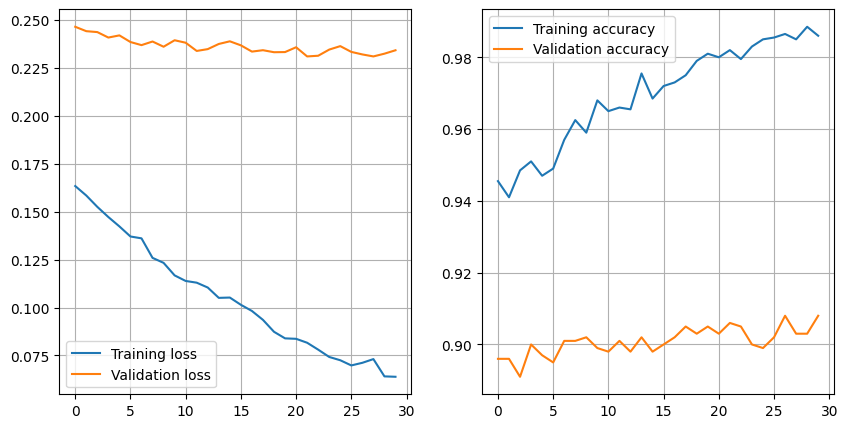

In [ ]:
history_dict = history.history
N1, N2 = 30, 30

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].plot(np.arange(N1), history_dict["loss"][:30], np.arange(N1), history_dict["val_loss"][:30])
ax[0].legend(["Training loss", "Validation loss"])
ax[0].grid()
ax[1].plot(np.arange(N1), history_dict["accuracy"][:30], np.arange(N1), history_dict["val_accuracy"][:30])
ax[1].legend(["Training accuracy", "Validation accuracy"])
ax[1].grid()
plt.show()

# Exercise 2

In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_5 (Flatten)         (None, 8192)              0         
                                                                 
 dense_8 (Dense)             (None, 256)               2097408   
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 16812353 (64.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
print('This is the number of trainable weights before freezing the conv base:',
      len(model.trainable_weights))

conv_base.trainable = False

print('This is the number of trainable weights '
      'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


In [ ]:
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=2e-5),
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [ ]:
train_datagen = image.ImageDataGenerator(
      rescale=1. / 255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
test_datagen = image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        "TRAIN",
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        "VALID",
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Epoch 1/30


<ipython-input-40-0bbc0a84e987>:27: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 - 14s - loss: 0.7151 - acc: 0.6875 - val_loss: 0.3080 - val_acc: 0.8620 - 14s/epoch - 140ms/step
Epoch 2/30
100/100 - 13s - loss: 0.4618 - acc: 0.7670 - val_loss: 0.3160 - val_acc: 0.8560 - 13s/epoch - 131ms/step
Epoch 3/30
100/100 - 13s - loss: 0.4121 - acc: 0.8040 - val_loss: 0.2920 - val_acc: 0.8740 - 13s/epoch - 131ms/step
Epoch 4/30
100/100 - 13s - loss: 0.3725 - acc: 0.8320 - val_loss: 0.2732 - val_acc: 0.8730 - 13s/epoch - 131ms/step
Epoch 5/30
100/100 - 13s - loss: 0.3644 - acc: 0.8350 - val_loss: 0.3194 - val_acc: 0.8550 - 13s/epoch - 131ms/step
Epoch 6/30
100/100 - 13s - loss: 0.3566 - acc: 0.8445 - val_loss: 0.2495 - val_acc: 0.8910 - 13s/epoch - 131ms/step
Epoch 7/30
100/100 - 13s - loss: 0.3428 - acc: 0.8465 - val_loss: 0.3590 - val_acc: 0.8580 - 13s/epoch - 131ms/step
Epoch 8/30
100/100 - 13s - loss: 0.3640 - acc: 0.8335 - val_loss: 0.2571 - val_acc: 0.8820 - 13s/epoch - 131ms/step
Epoch 9/30
100/100 - 13s - loss: 0.3438 - acc: 0.8415 - val_loss: 0.2627 - val_acc:

In [ ]:
model.save('weights.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


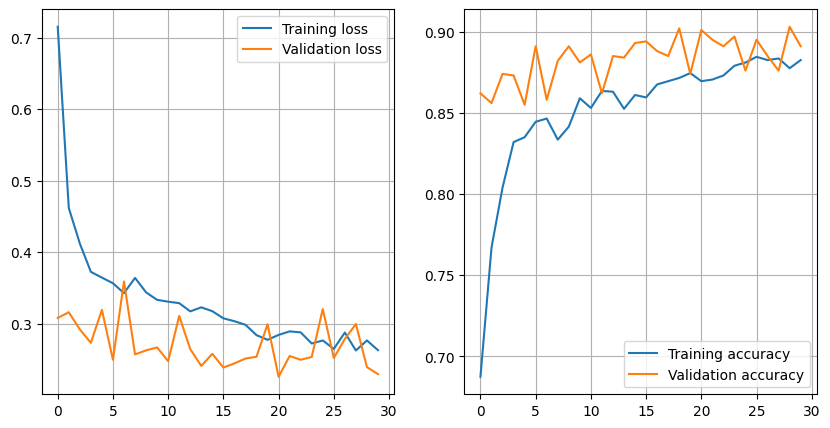

In [ ]:
history_dict = history.history
N1, N2 = 30, 30

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].plot(np.arange(N1), history_dict["loss"][:30], np.arange(N1), history_dict["val_loss"][:30])
ax[0].legend(["Training loss", "Validation loss"])
ax[0].grid()
ax[1].plot(np.arange(N1), history_dict["acc"][:30], np.arange(N1), history_dict["val_acc"][:30])
ax[1].legend(["Training accuracy", "Validation accuracy"])
ax[1].grid()
plt.show()

# Exercise 3

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
conv_base.trainable = True
set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True

    layer.trainable = set_trainable

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_5 (Flatten)         (None, 8192)              0         
                                                                 
 dense_8 (Dense)             (None, 256)               2097408   
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 9177089 (35.01 MB)
Non-trainable params: 7635264 (29.13 MB)
_________________________________________________________________


In [ ]:
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/50


<ipython-input-50-c6a11c08c87e>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 14s 131ms/step - loss: 0.1313 - accuracy: 0.9490 - val_loss: 0.2163 - val_accuracy: 0.9270
Epoch 2/50
100/100 [==============================] - 13s 131ms/step - loss: 0.1637 - accuracy: 0.9285 - val_loss: 0.2251 - val_accuracy: 0.9230
Epoch 3/50
100/100 [==============================] - 13s 131ms/step - loss: 0.1338 - accuracy: 0.9475 - val_loss: 0.2252 - val_accuracy: 0.9260
Epoch 4/50
100/100 [==============================] - 13s 131ms/step - loss: 0.1225 - accuracy: 0.9470 - val_loss: 0.2151 - val_accuracy: 0.9160
Epoch 5/50
100/100 [==============================] - 13s 131ms/step - loss: 0.1334 - accuracy: 0.9470 - val_loss: 0.2210 - val_accuracy: 0.9220
Epoch 6/50
100/100 [==============================] - 13s 131ms/step - loss: 0.1223 - accuracy: 0.9525 - val_loss: 0.2489 - val_accuracy: 0.9190
Epoch 7/50
100/100 [==============================] - 13s 132ms/step - loss: 0.1098 - accuracy: 0.9550 - val_loss: 0.2189 - val_accuracy: 0.9

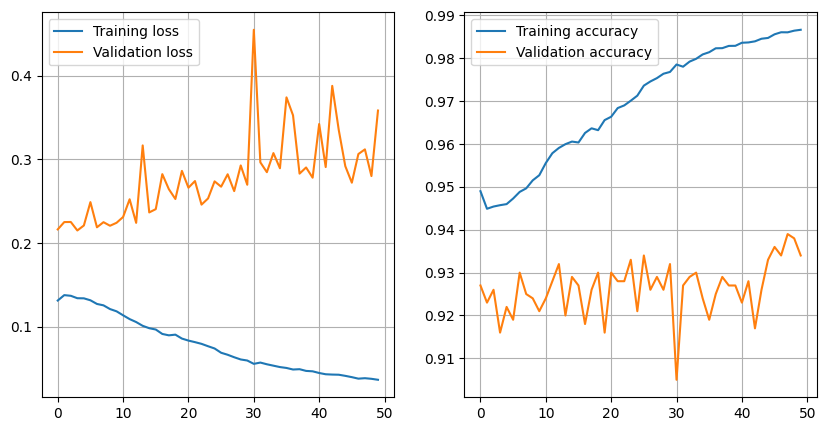

In [ ]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points


history_dict = history.history
N1, N2 = 50, 50

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].plot(np.arange(N1), smooth_curve(history_dict["loss"][:50]), np.arange(N1), history_dict["val_loss"][:50])
ax[0].legend(["Training loss", "Validation loss"])
ax[0].grid()
ax[1].plot(np.arange(N1), smooth_curve(history_dict["accuracy"][:50]), np.arange(N1), history_dict["val_accuracy"][:50])
ax[1].legend(["Training accuracy", "Validation accuracy"])
ax[1].grid()
plt.show()

In [ ]:
test_generator = test_datagen.flow_from_directory(
        "TEST",
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.


<ipython-input-56-7624fedf2ed4>:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)


test acc: 0.9129999876022339
